# 🧠 Text Preprocessing

## 📌 Project Overview
Text preprocessing is the essential first step in any NLP pipeline. It helps clean, normalize, and prepare raw text data for models — whether for traditional ML, deep learning, or LLMs.

In this notebook, we explore and compare several powerful text preprocessing techniques using:

- 🧰 NLTK
- ⚙️ SpaCy
- 🤗 Hugging Face Transformers

We will visualize, compare outputs, and analyze tradeoffs between these methods on real-world data.

### Imports

In [4]:
# Base Libraries
import nltk
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# NLP
from nltk.corpus import twitter_samples

## Loading the data & Visualizing
We use NLTK’s `twitter_samples` dataset, which includes 10,000 tweets:
- 5,000 positive
- 5,000 negative


In [ ]:
# Downloading the data
nltk.download('twitter_samples')
#nltk.download('punkt')  # For tokenization
#nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [14]:
# Loading positive tweets separately
positive_tweets = twitter_samples.strings('positive_tweets.json')
# Loading negative tweets separately
negative_tweets = twitter_samples.strings('negative_tweets.json')

# Loading the Positive & Negative tweets
tweets = twitter_samples.strings('positive_tweets.json') + twitter_samples.strings('negative_tweets.json')

# Visualizing
print("Example of first tweet loaded:", tweets[0])
print("Total number of tweets:", len(tweets))
print("Total number of positive tweets:", len(positive_tweets))
print("Total number of negative tweets:", len(negative_tweets))
print("Type of 'tweets'", type(tweets))
print("Type of each tweet", type(tweets[0]))

Example of first tweet loaded: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
Total number of tweets: 10000
Total number of positive tweets: 5000
Total number of negative tweets: 5000
Type of 'tweets' <class 'list'>
Type of each tweet <class 'str'>


### Visual Summary

- **Tweet Lengths**: Most tweets contain between **5 and 15 words**, as expected from short-form social media text.
- **Sentiment Classes**: There is an **equal distribution** of positive and negative tweets — 5,000 each — making it ideal for balanced comparison and preprocessing evaluation.


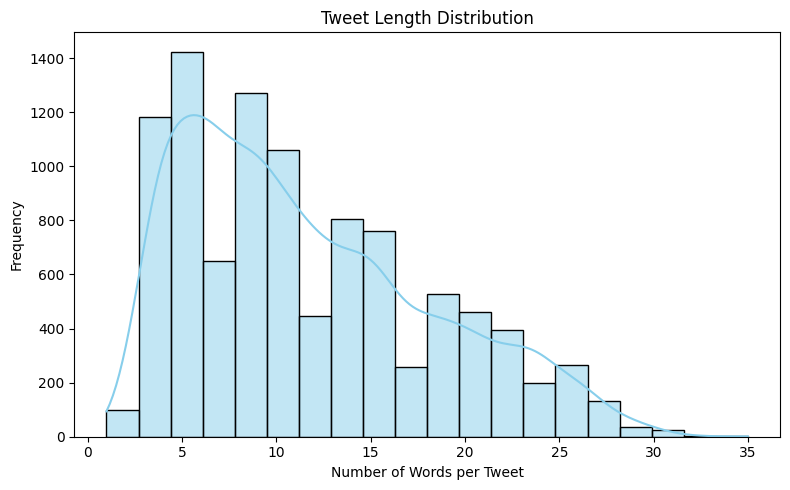

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Word count per tweet
tweet_lengths = [len(tweet.split()) for tweet in tweets]

plt.figure(figsize=(8, 5))
sns.histplot(tweet_lengths, bins=20, kde=True, color='skyblue')
plt.title("Tweet Length Distribution")
plt.xlabel("Number of Words per Tweet")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


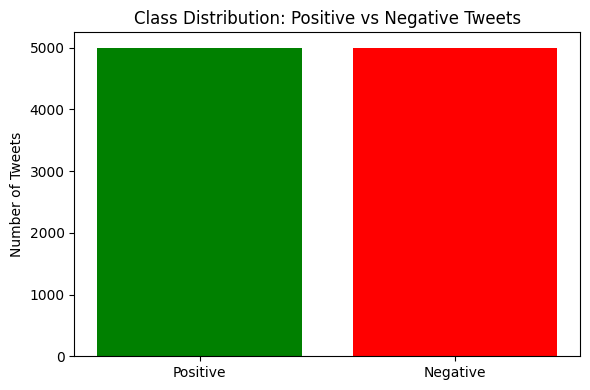

In [16]:
import matplotlib.pyplot as plt

# Tweet counts
labels = ['Positive', 'Negative']
counts = [len(positive_tweets), len(negative_tweets)]

# Plot
plt.figure(figsize=(6,4))
plt.bar(labels, counts, color=['green', 'red'])
plt.title("Class Distribution: Positive vs Negative Tweets")
plt.ylabel("Number of Tweets")
plt.tight_layout()
plt.show()